<a href="https://colab.research.google.com/github/adelriscom/DataScience/blob/main/Assiment3BigDataPlatforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import folium
from IPython.display import display



In [2]:
cdr = pd.read_csv('/content/drive/MyDrive/CVD_cleaned.csv')
print(cdr.shape)
display(cdr.head())

(308854, 19)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


## Setting the target variable

In [10]:
target = 'Heart_Disease'

In [15]:
## for EDA of categorical values
def eda_bivariate_categorical(cdr,column,target):

    fig,ax = plt.subplots(figsize = (9,8))

    color = 'Set2'

    palette_color = sn.color_palette(color)

    ax = sn.countplot(x = column, data=cdr, hue=target,palette=color,order = cdr[column].value_counts().index)
    ax.set_ylabel('Count')
    plt.xticks(rotation=90)

    offset = cdr[column].value_counts().max() * 0.005

    list_bars = cdr.groupby([column,target])[column].agg(['count']).unstack().fillna(0).values

    patches = ax.patches
    bars_pos = 0

    for i in range(cdr[target].nunique()):
        for j in range(cdr[column].nunique()):
            list_bars_col = list_bars[j]
            total_sum = list_bars_col.sum()
            value = list_bars_col[i]

            percentage = value / total_sum

            if percentage == 0:
                bars_pos += 1
                continue
            else:
                x = patches[bars_pos].get_x() + patches[j].get_width()/2
                y = patches[bars_pos].get_height() + offset
                ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')
                bars_pos += 1

    plt.show()

In [17]:
## Function that plots numerical variables into histogram and violin plot
def eda_bivariate_numerical(data,column,target,color,
                    figsize=(12,6),
                    # save=True,
                    val=0,
                    target_type = 'Numerical'):

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    cmap = sn.color_palette(color)
    val = val

    for i in range(1):
        for j in range(2):
            if j==0:
                    sn.histplot(data = data,x=data[column],hue=target,
                                bins=50,kde=True,palette=color,ax=axes[j])
                    axes[j].set(xlabel=None)
                    axes[j].grid(False)
            elif j==1:
                sn.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',
                )
                axes[j].set(xlabel=None)
                axes[j].grid(False)
                val += 1
                plt.tight_layout()
            if target_type == 'Numerical':
                plt.suptitle(column)
            else:
                plt.suptitle(f'{column} vs. {target}')
    plt.show()

    # path = 'Figures\\Numerical\\'
    # if save:
    #     plt.savefig(f"{path}{column}.pdf",dpi=1000)


## print text to see the font
def print_text(text):
    fig, ax = plt.subplots(figsize=(6, 1), facecolor="#eefade")
    ax.text(0.5, 0.5, text, ha='center', va='center', size=40)
    ax.axis("off")
    plt.show()

## classify columns into categorical and quantitative variables

In [3]:
def check_variables(df: pd.DataFrame):
  cols = df.columns
  quantitative_cols = df._get_numeric_data().columns
  categorical_cols = list(set(cols) - set(quantitative_cols))
  return categorical_cols, list(set(quantitative_cols))

cat_cols, quan_cols = check_variables(cdr)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['Age_Category', 'Depression', 'Sex', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Checkup', 'Arthritis', 'Heart_Disease', 'Smoking_History', 'General_Health', 'Exercise']
quantitative columns: ['Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Height_(cm)', 'Alcohol_Consumption', 'BMI', 'Weight_(kg)']


In [4]:
cdr.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

## Check for missing values


In [5]:
print(cdr.isnull().sum())

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


## Verifying irrelevant columns

In [6]:
categorical_cols = ['Age_Category', 'Depression', 'Sex', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Checkup', 'Arthritis', 'Heart_Disease', 'Smoking_History', 'General_Health', 'Exercise']
for col in categorical_cols:
    print(f"Column: {col} : {cdr[col].nunique()} sublevels")
    print(cdr[col].value_counts())
    print("\n")

Column: Age_Category : 13 sublevels
65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name: Age_Category, dtype: int64


Column: Depression : 2 sublevels
No     246953
Yes     61901
Name: Depression, dtype: int64


Column: Sex : 2 sublevels
Female    160196
Male      148658
Name: Sex, dtype: int64


Column: Skin_Cancer : 2 sublevels
No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64


Column: Other_Cancer : 2 sublevels
No     278976
Yes     29878
Name: Other_Cancer, dtype: int64


Column: Diabetes : 4 sublevels
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64


Column: Checkup : 5 sublevels
Within the past year       239371
Within the past 2 year

## Verifying quantitative variables

In [7]:
cdr.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


## Verifying outliers

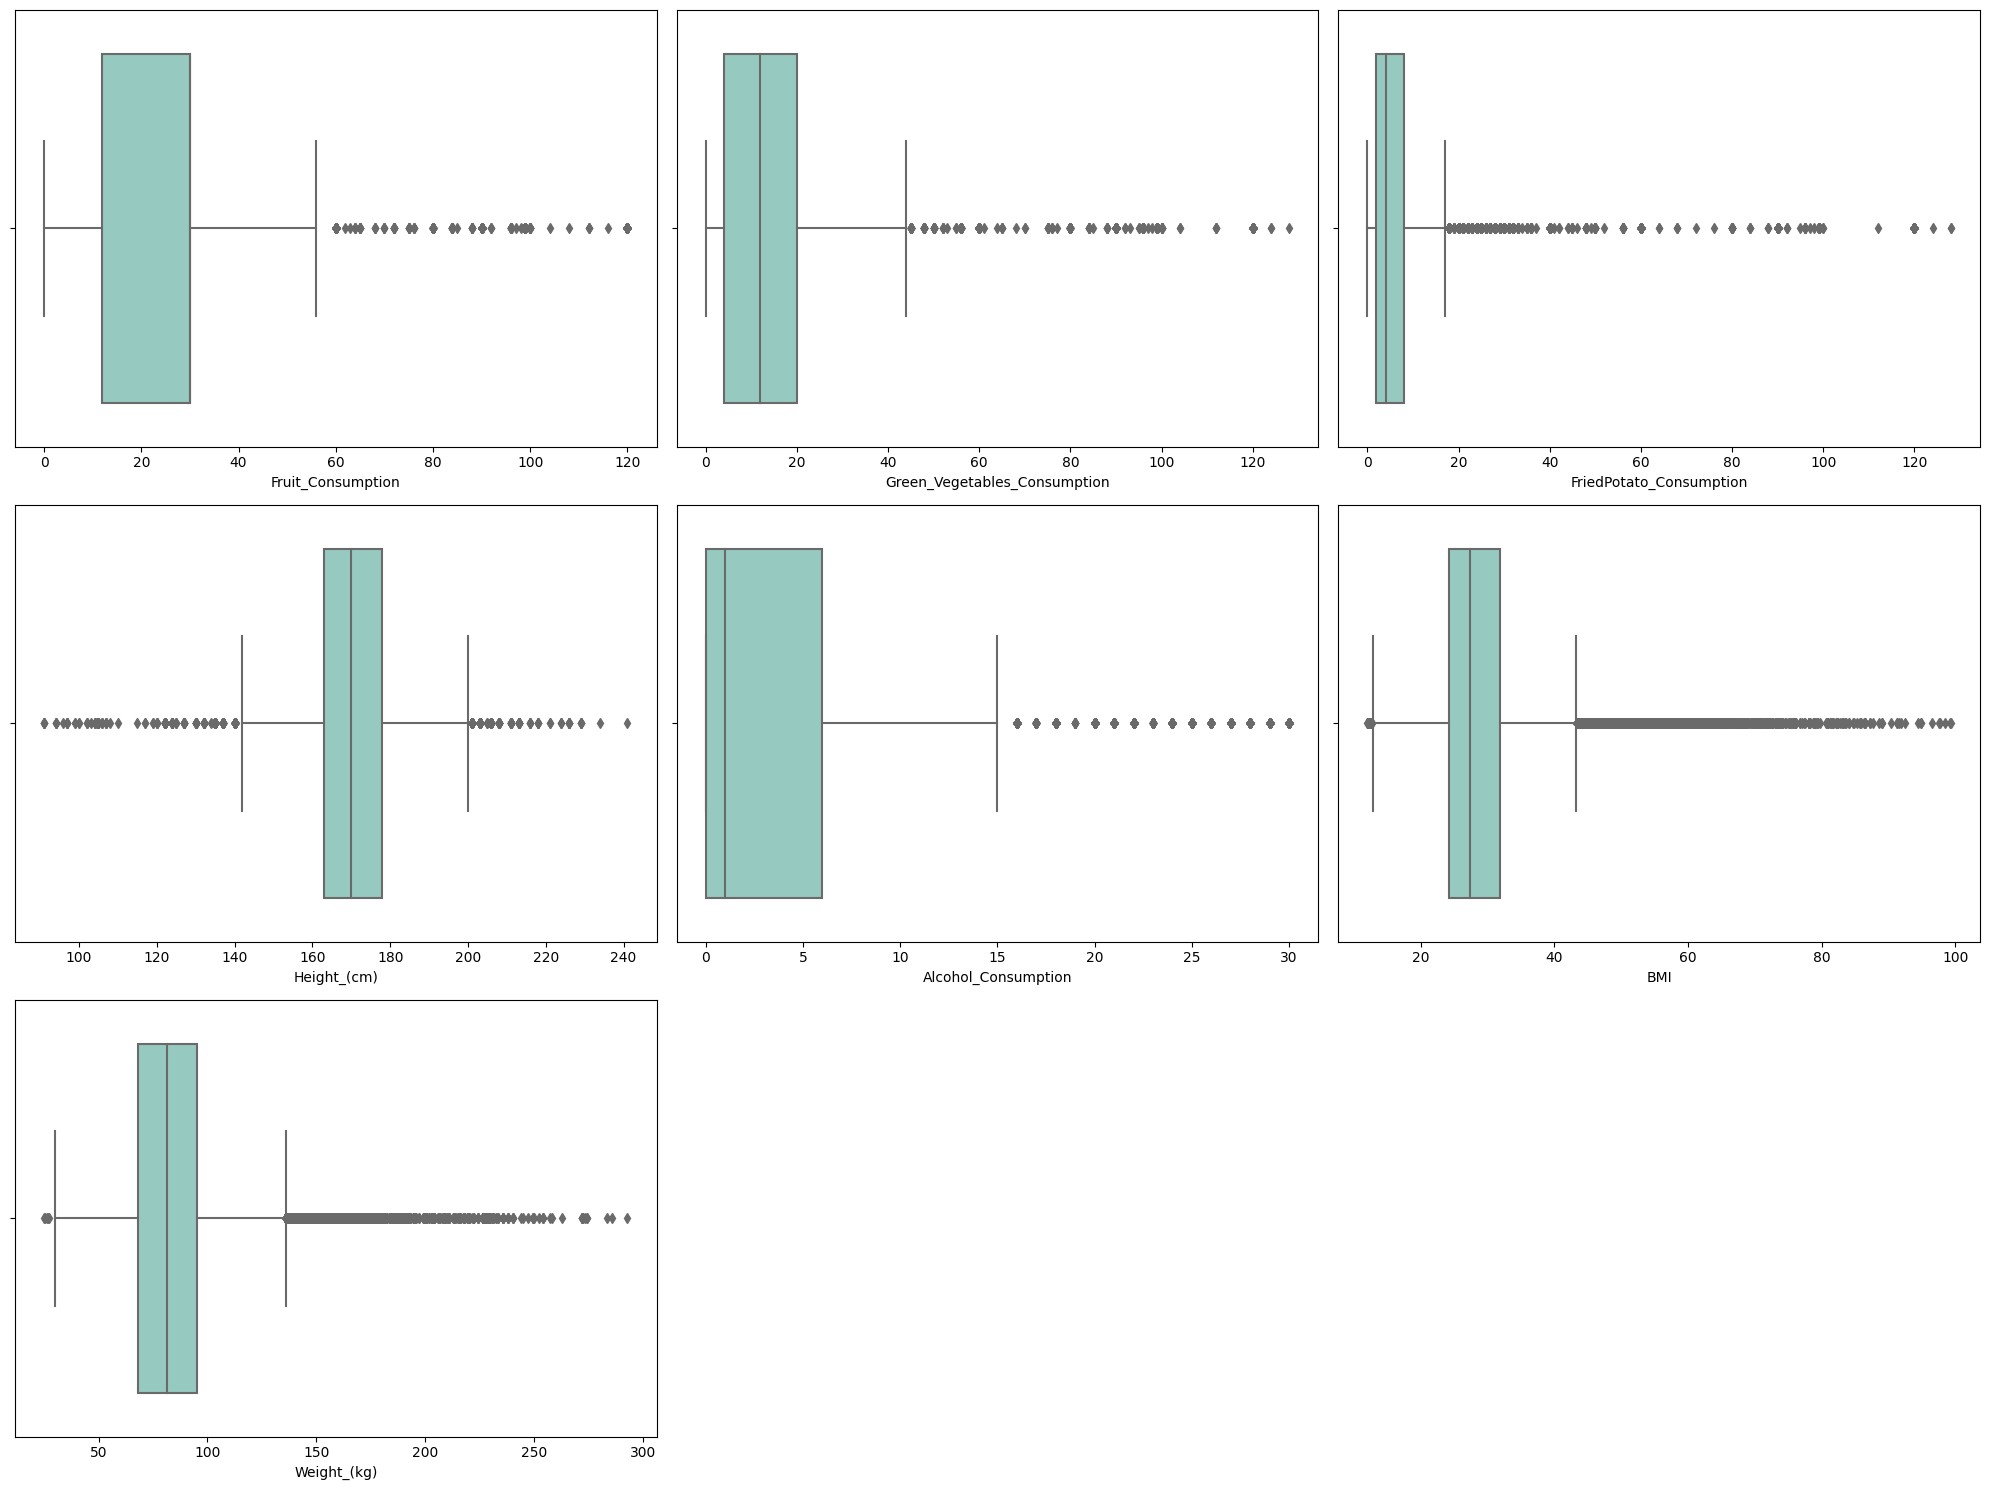

In [8]:
# Define the quantitative variables
quantitative_cols = ['Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Height_(cm)', 'Alcohol_Consumption', 'BMI', 'Weight_(kg)']

# Create a figure with a grid of plots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axs = axs.flatten()

# Create a boxplot for each variable and add it to the corresponding subplot
for i, col in enumerate(quantitative_cols):
    sn.boxplot(x=cdr[col], ax=axs[i], palette='Set3')
    axs[i].set_xlabel(col)

# Remove any extra subplots
for i in range(len(quantitative_cols), len(axs)):
    axs[i].remove()

plt.tight_layout()
plt.show()

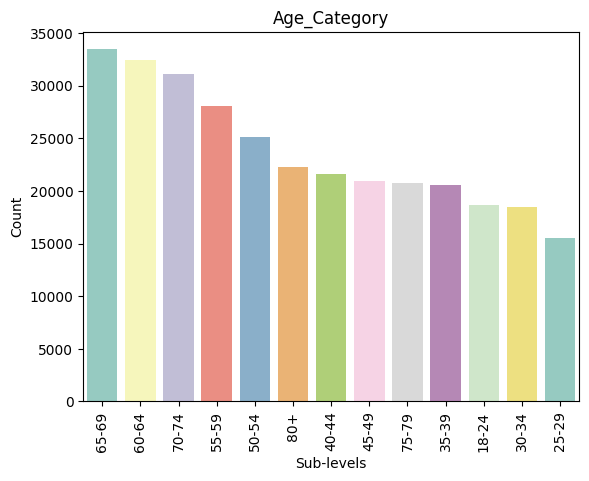

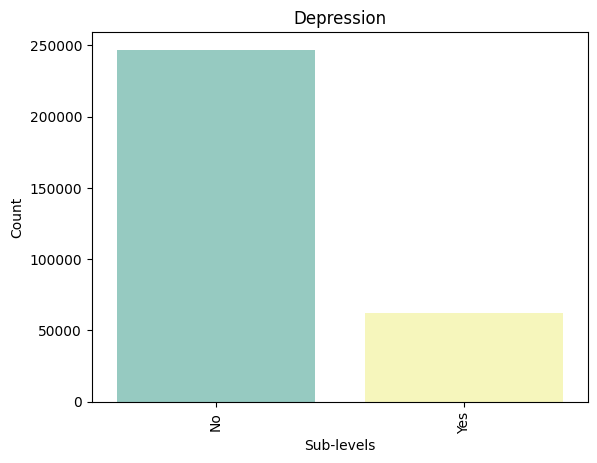

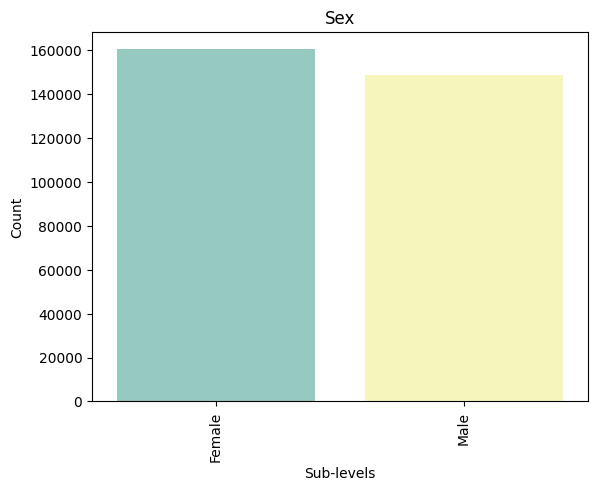

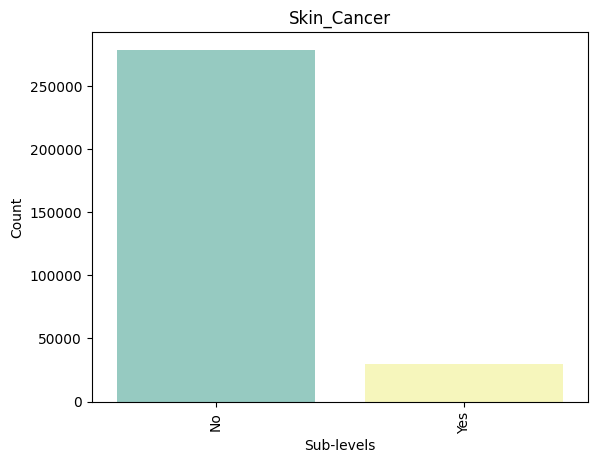

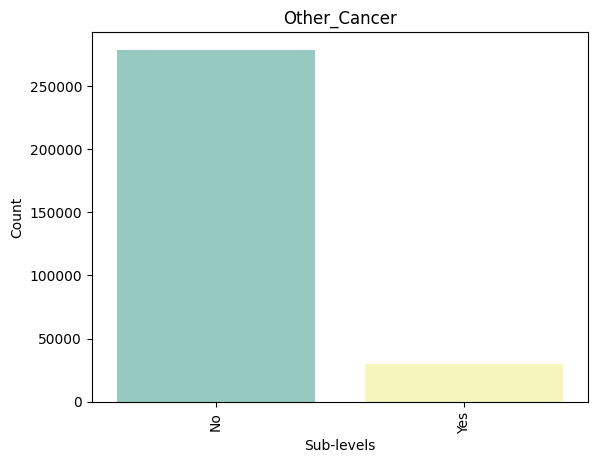

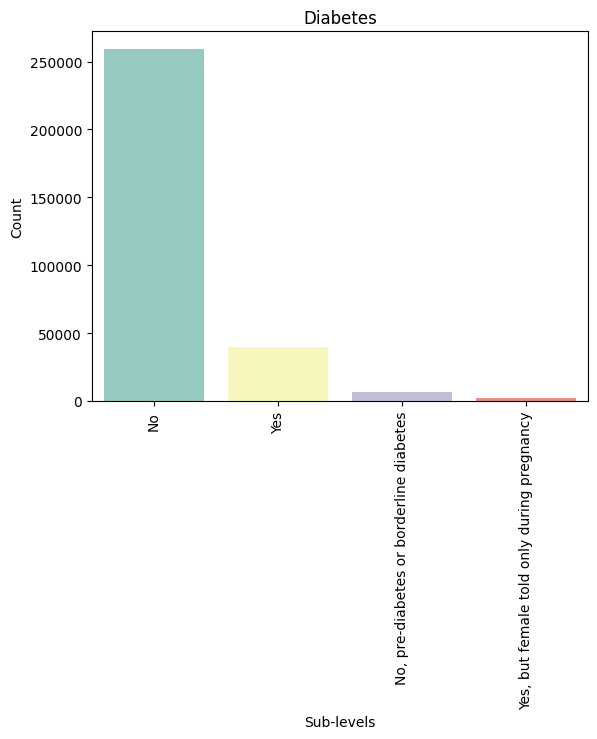

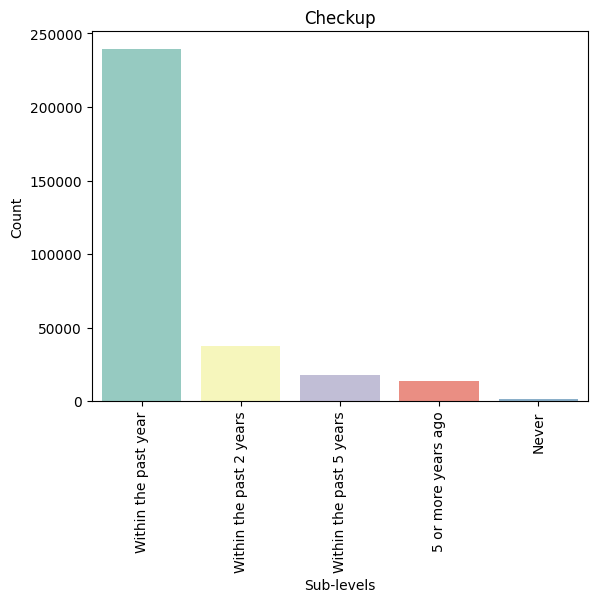

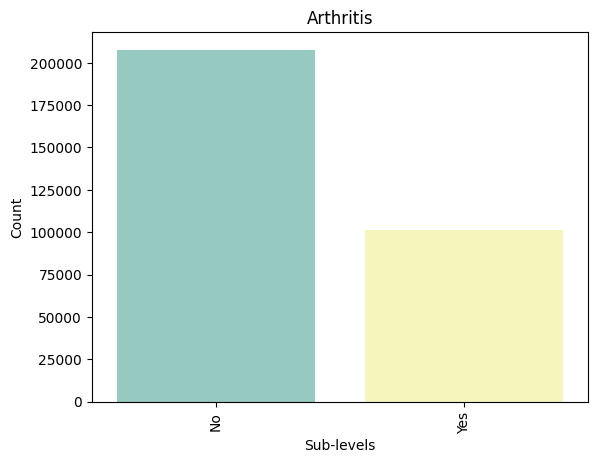

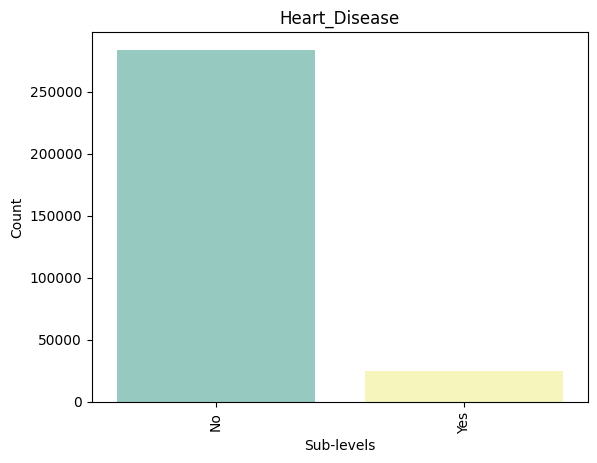

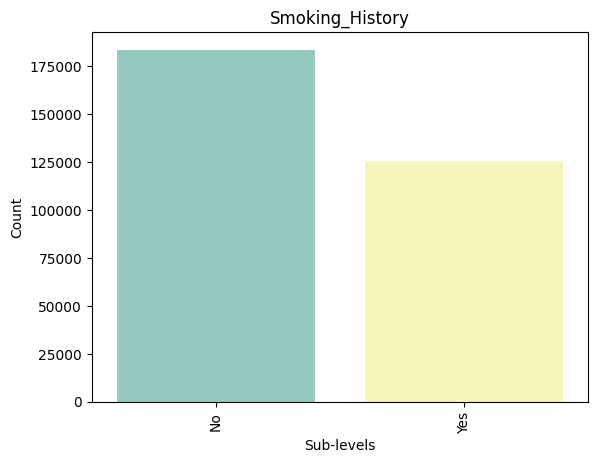

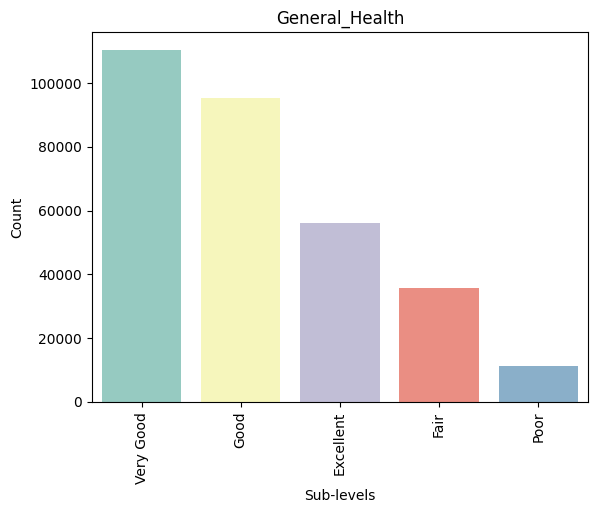

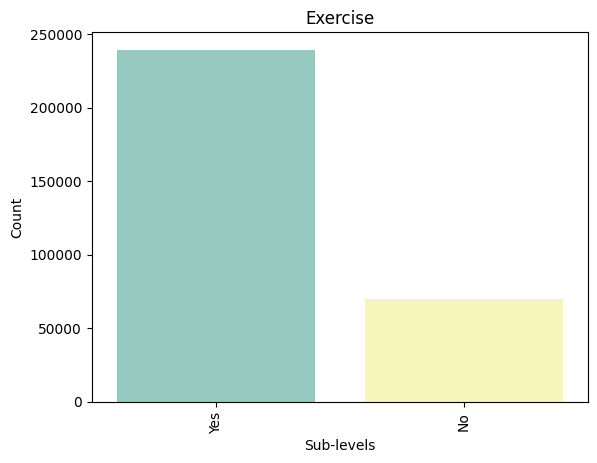

In [9]:
categorical_cols = ['Age_Category', 'Depression', 'Sex', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Checkup', 'Arthritis', 'Heart_Disease', 'Smoking_History', 'General_Health', 'Exercise']

for col in categorical_cols:
    sublevels = cdr[col].value_counts()
    fig, ax = plt.subplots()
    sn.barplot(x=sublevels.index, y=sublevels.values, ax=ax, palette="Set3")
    ax.set_title(f"{col}")
    ax.set_xlabel("Sub-levels")
    ax.set_ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

# Bivariate Analysis

Age_Category vs. Heart_Disease


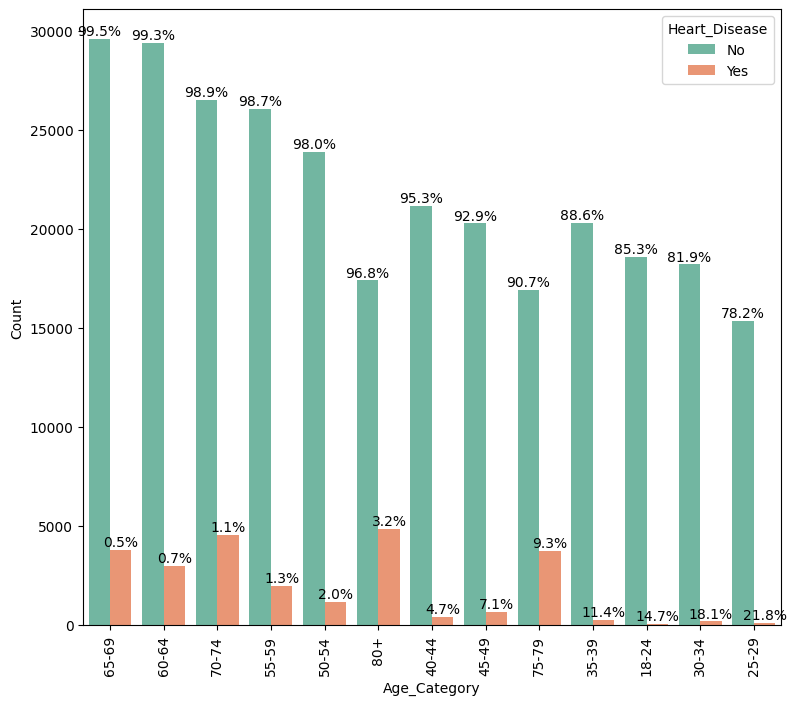

Depression vs. Heart_Disease


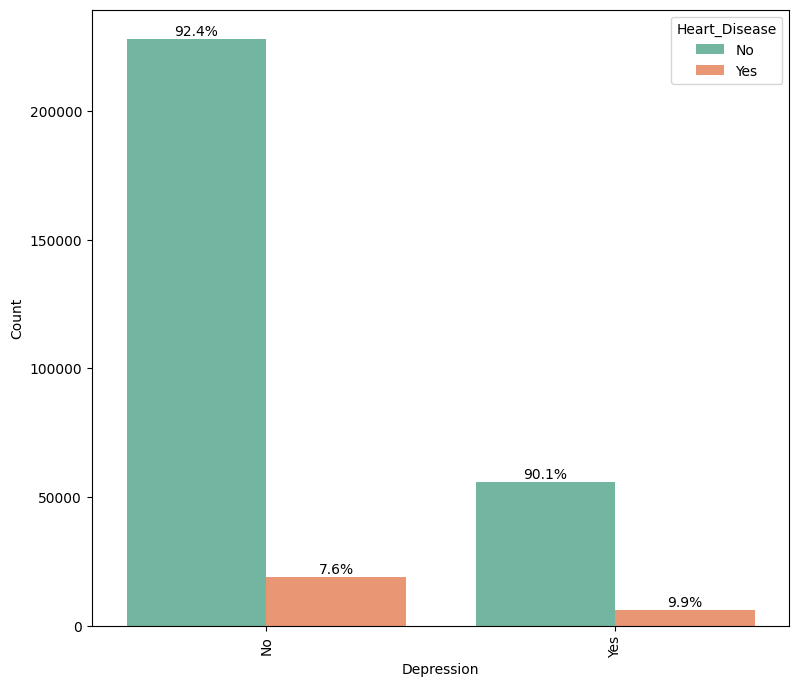

Sex vs. Heart_Disease


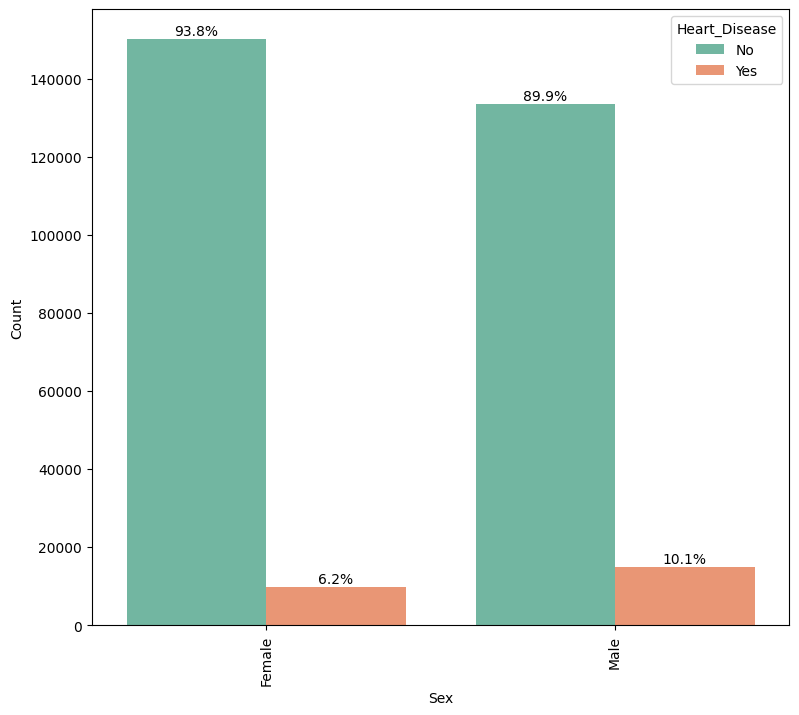

Skin_Cancer vs. Heart_Disease


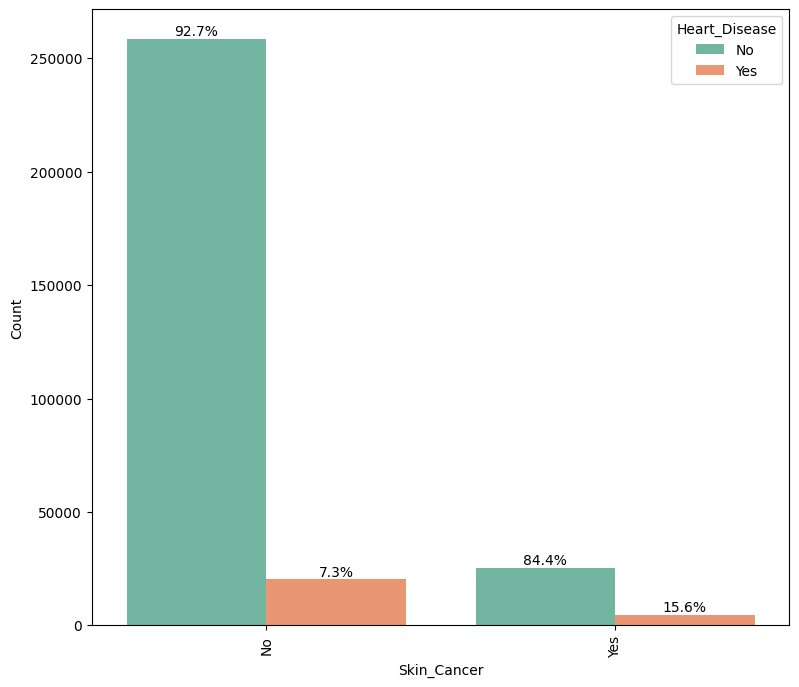

Other_Cancer vs. Heart_Disease


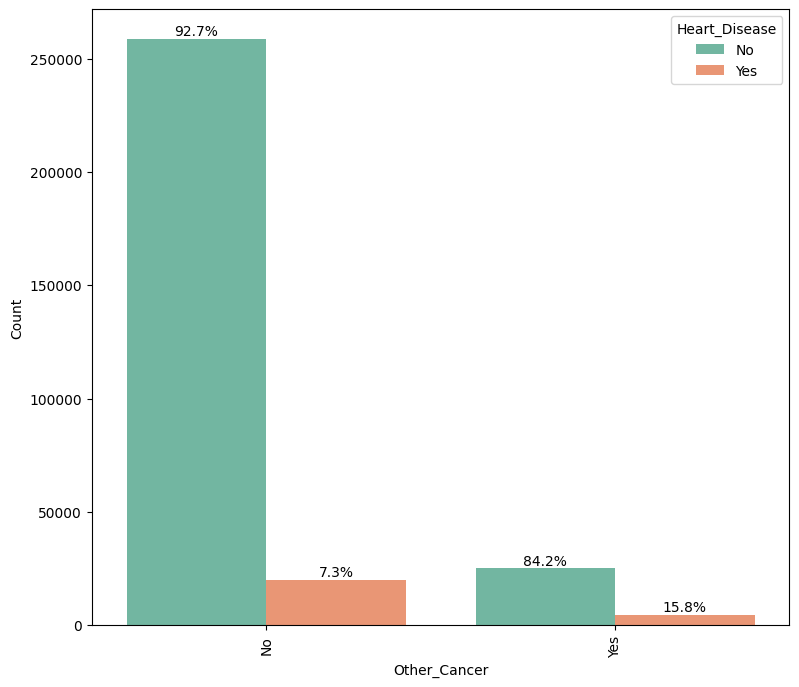

Diabetes vs. Heart_Disease


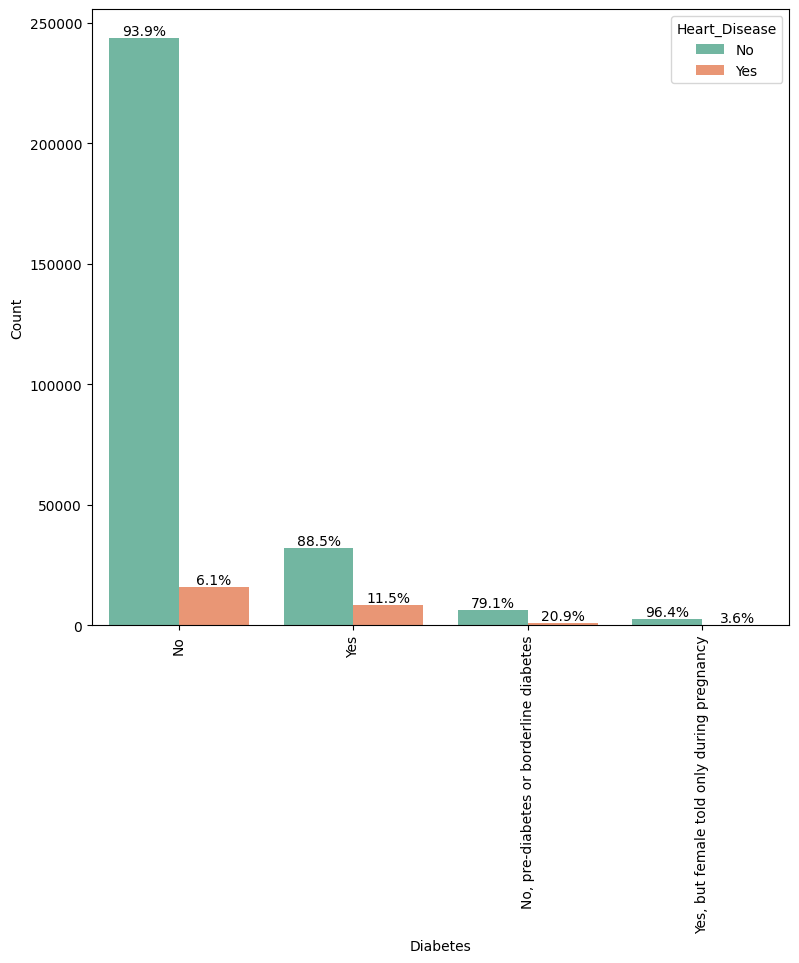

Checkup vs. Heart_Disease


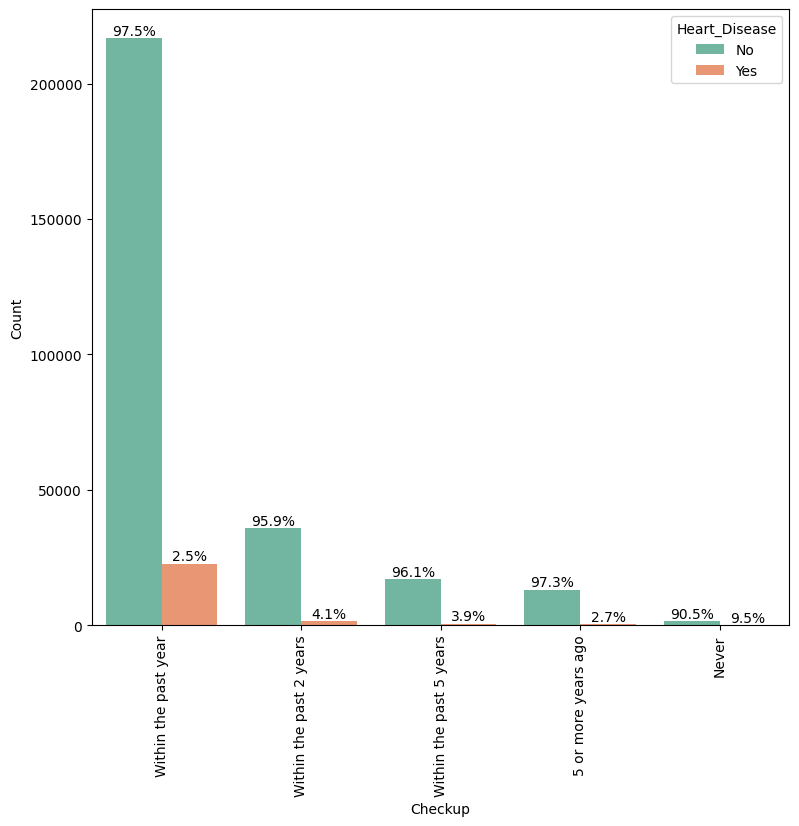

Arthritis vs. Heart_Disease


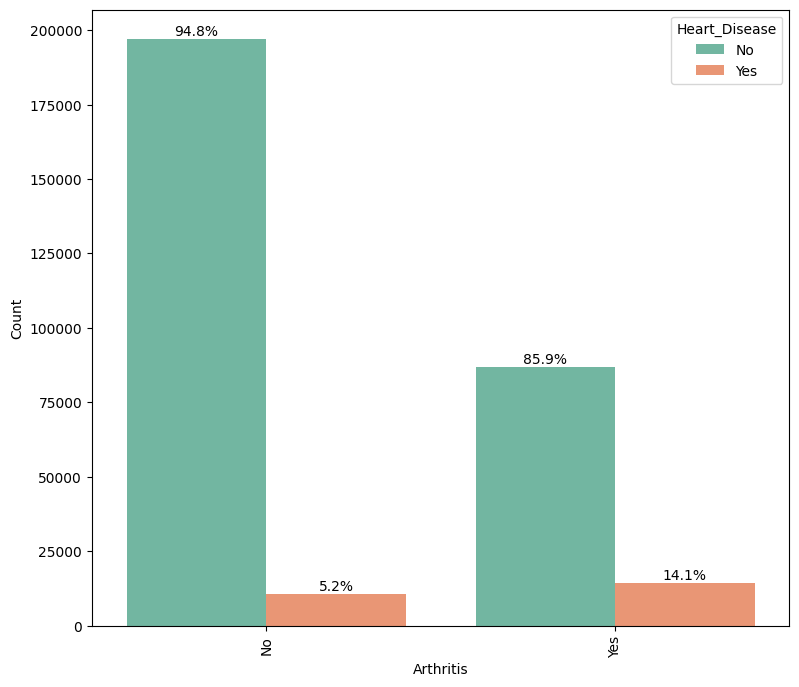

Smoking_History vs. Heart_Disease


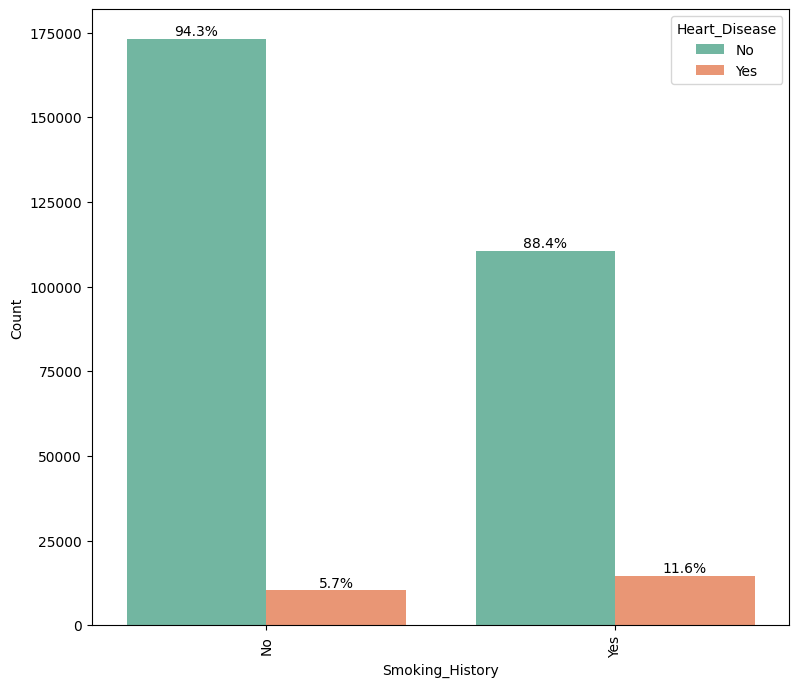

General_Health vs. Heart_Disease


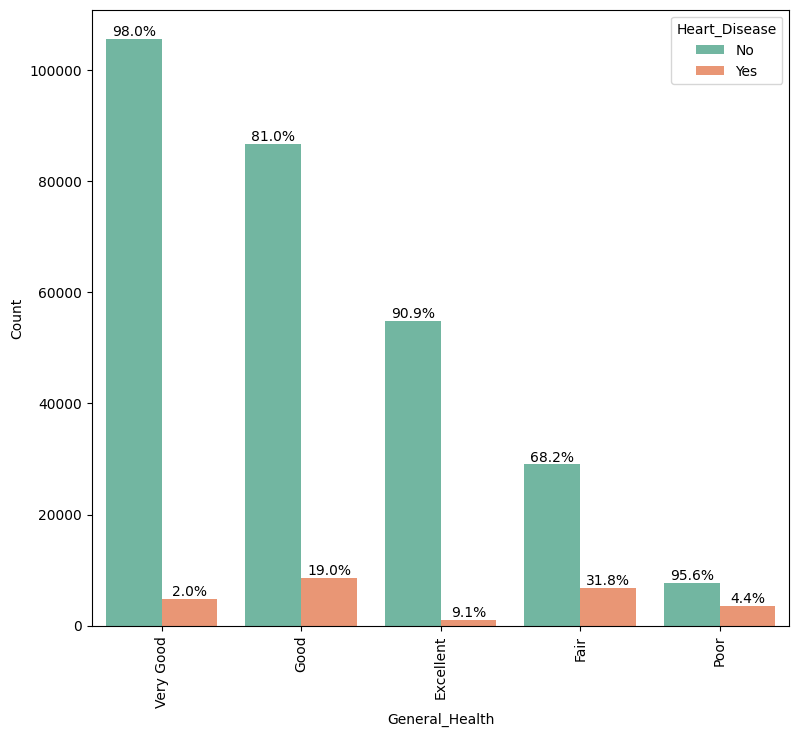

Exercise vs. Heart_Disease


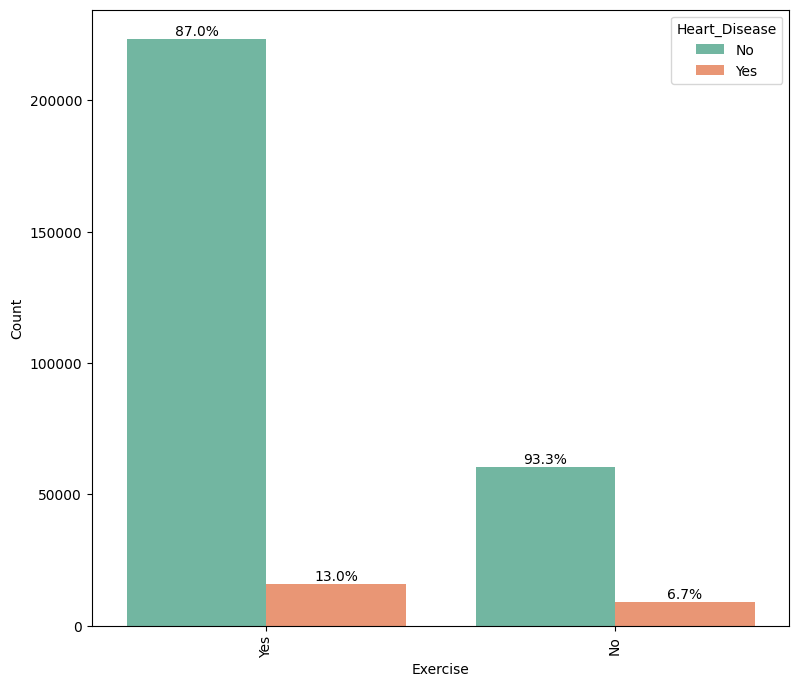

In [16]:
for i in categorical_cols:
  if i == target:
    continue

  if cdr[i].nunique() > 15:
    print(f'column {i} has many unique values n = {cdr[i].nunique()} and will not be plotted ')
    print("==============================================================================")

    continue

  if i in cdr.columns:
    print(f'{i} vs. {target}')
    eda_bivariate_categorical(cdr, i, target)
    print("================================================================================")



Fruit_Consumption vs. Heart_Disease


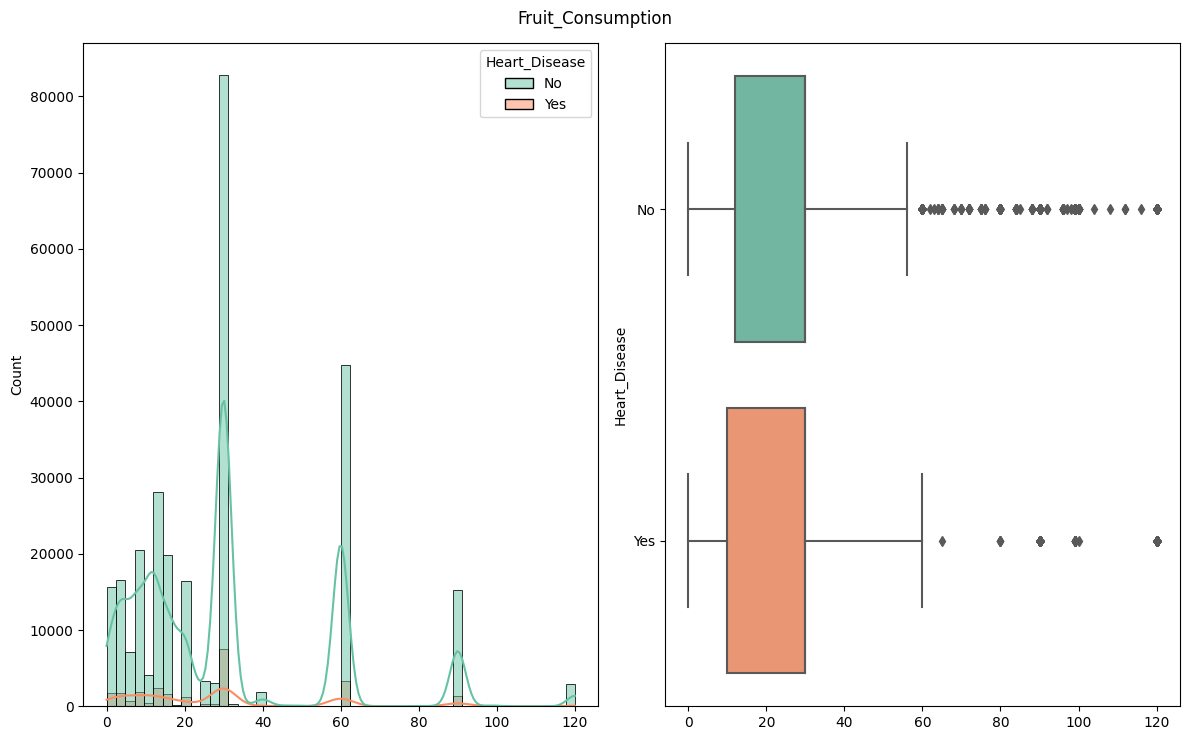

Green_Vegetables_Consumption vs. Heart_Disease


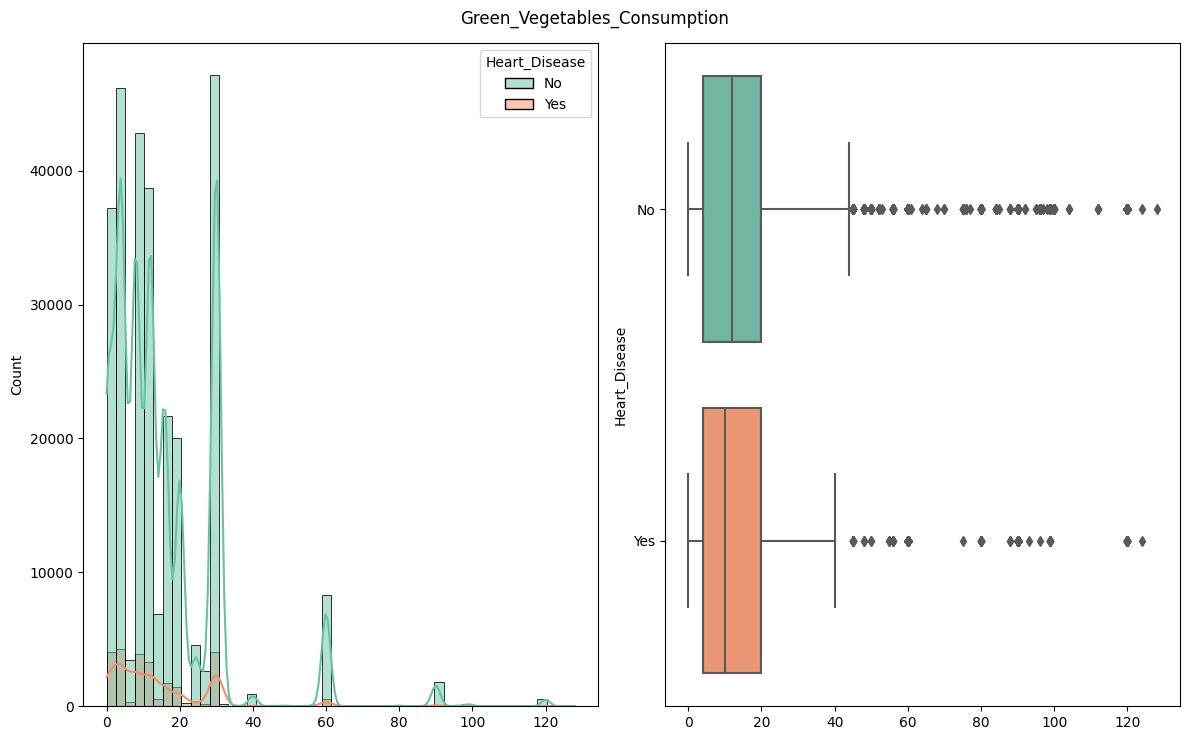

FriedPotato_Consumption vs. Heart_Disease


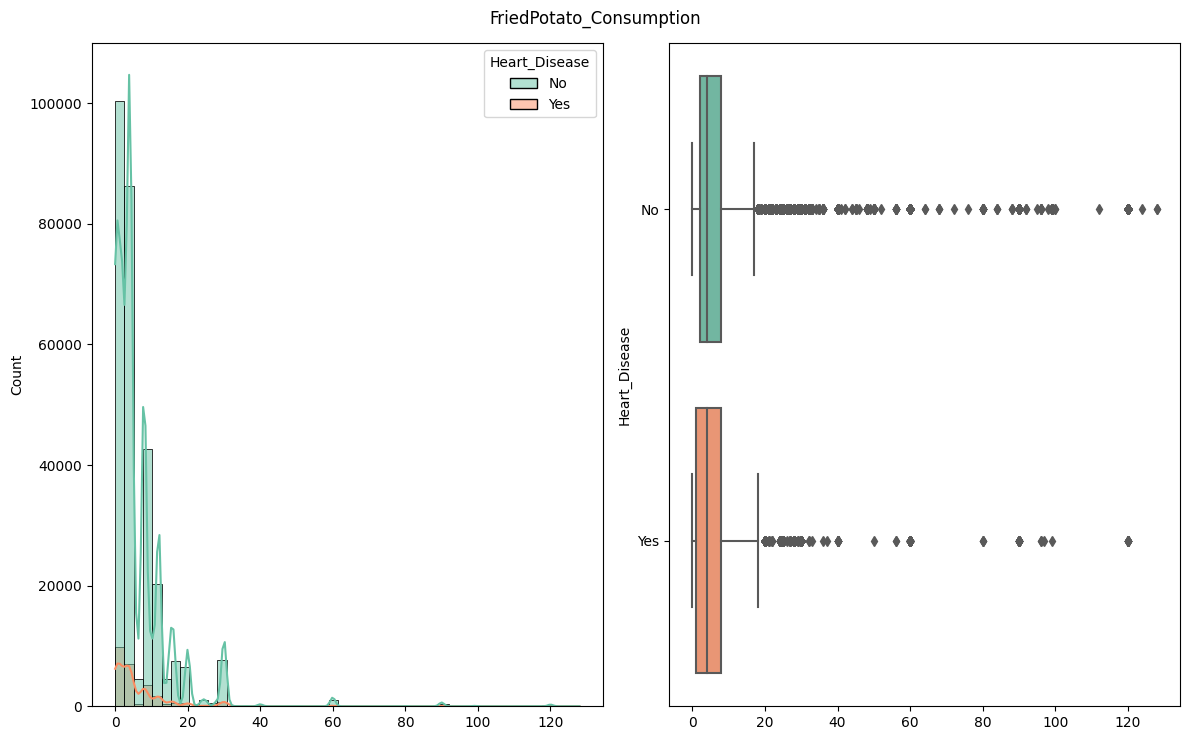

Height_(cm) vs. Heart_Disease


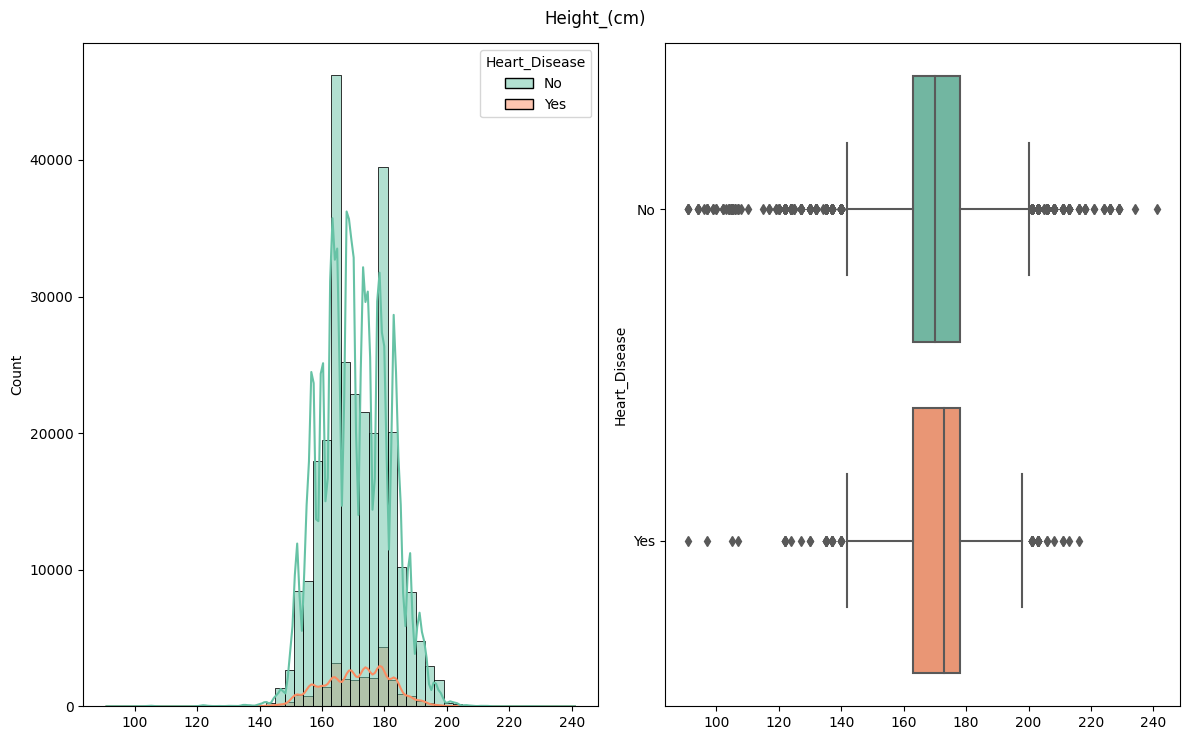

Alcohol_Consumption vs. Heart_Disease


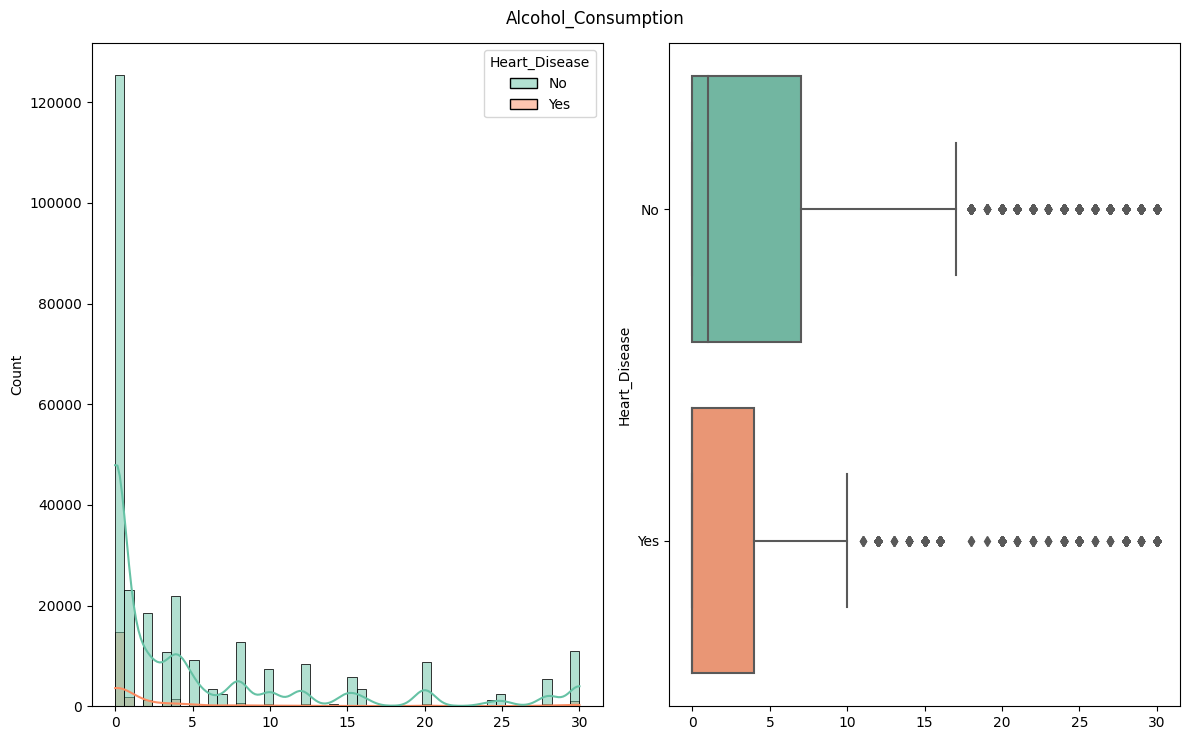

BMI vs. Heart_Disease


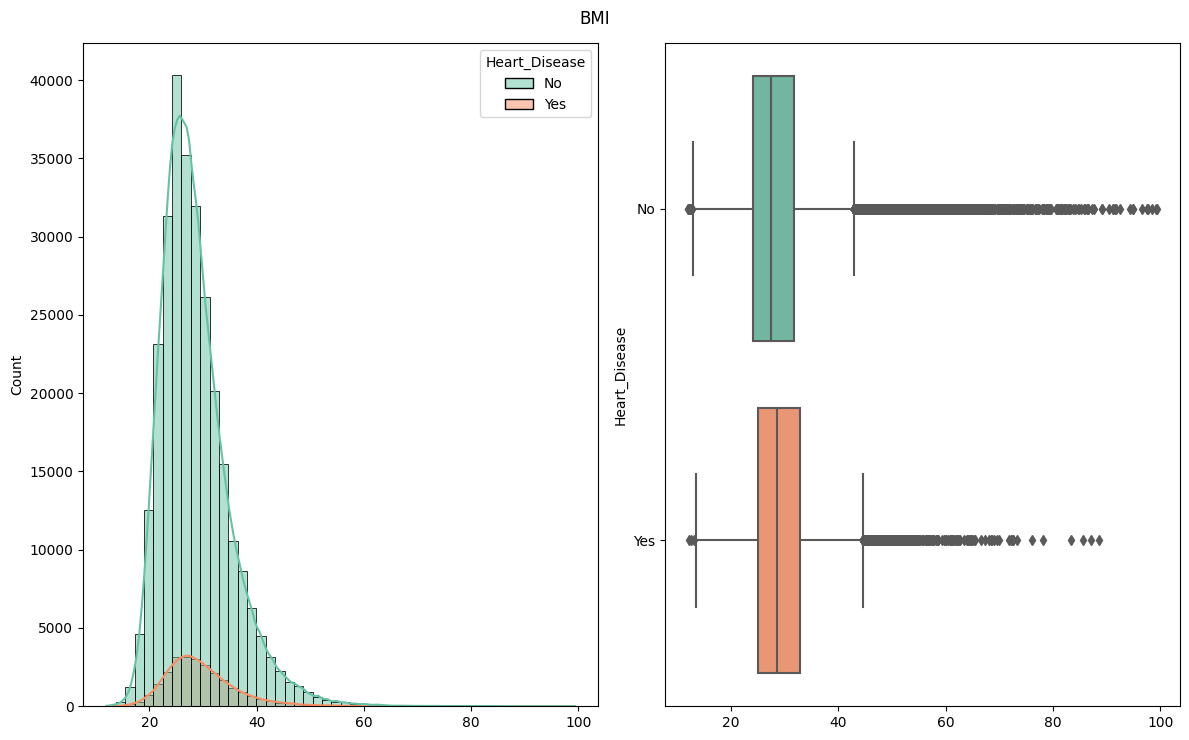

Weight_(kg) vs. Heart_Disease


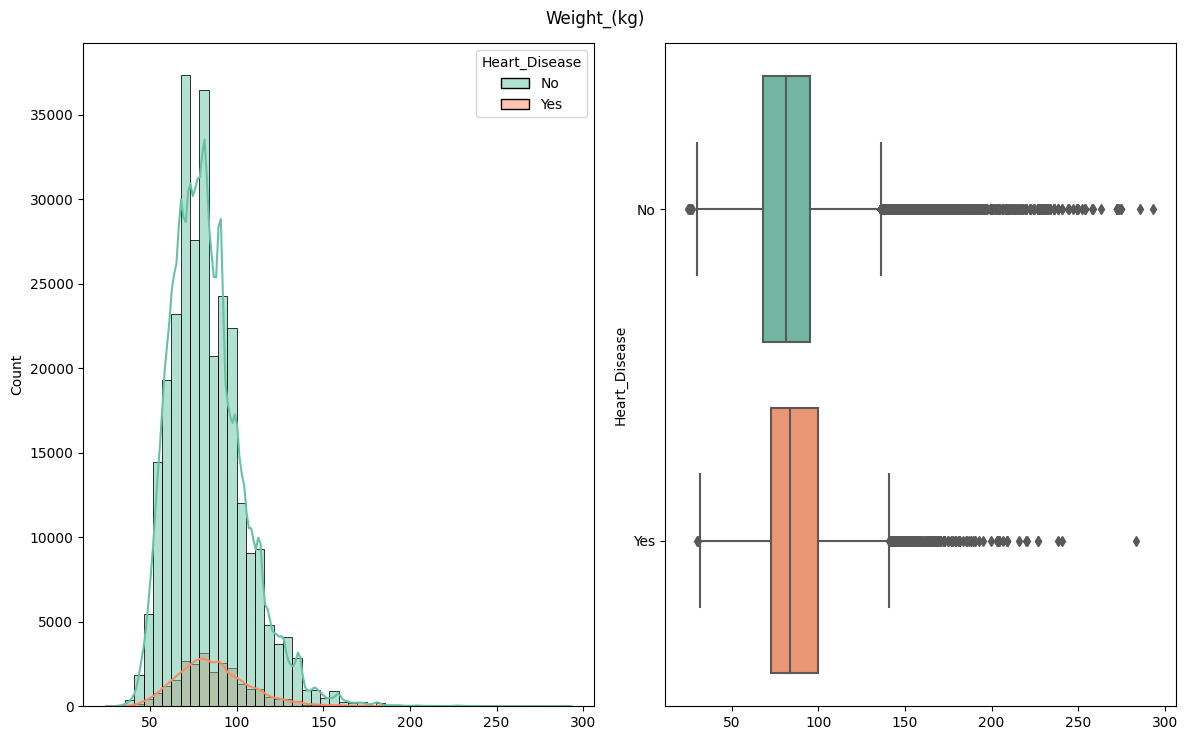

In [18]:
for i in quantitative_cols:
        if i == target:
            continue

        if i in cdr.columns:
            print(f'{i} vs. {target}')
            eda_bivariate_numerical(
                    data = cdr,
                    column = i,
                    target = target,
                    color = 'Set2',
                    figsize=(12,7.5),
                    val=0)
            print('=======================================================')